Ad 1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
%matplotlib inline

In [40]:
gatunki = pd.read_csv('tmdb_genres.csv')

In [41]:
filmy = pd.read_csv('tmdb_movies.csv')

In [42]:
df=filmy[filmy.vote_count>filmy.vote_count.quantile(0.75)].sort_values('vote_average', ascending=False).head(10)
df[['title', 'vote_average', 'vote_count']]

,title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
2294,Spirited Away,8.3,3840
3865,Whiplash,8.3,4254
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
662,Fight Club,8.3,9413
2170,Psycho,8.2,2320
1847,GoodFellas,8.2,3128


Ad 2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [71]:
f=filmy

In [72]:
f['year'] = pd.to_datetime(f['release_date']).dt.year

In [73]:
f=f[(f.year>=2010) & (f.year<=2016)].groupby(f.year)[['revenue', 'budget']].mean()

In [74]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

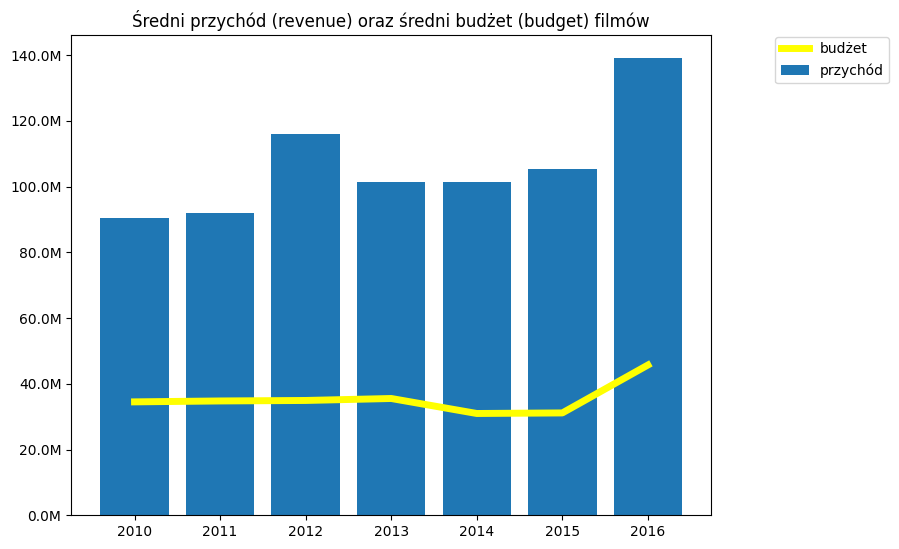

In [75]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
x = f.index
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.bar(x,f.revenue,label='przychód')
axes.plot(x,f.budget,label='budżet',color='yellow',linewidth=5)
axes.set_title('Średni przychód (revenue) oraz średni budżet (budget) filmów')
axes.legend(loc=(1.10,0.9))

Ad 3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [48]:
gatunki.rename(columns={gatunki.columns[0]: 'genre_id'}, inplace = True)

In [49]:
filmy=pd.merge(filmy,gatunki, how='inner', on='genre_id')

In [50]:
filmy

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,2015.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4714,0,NaN,282128,en,An American in Hollywood,A talented young filmmaker from New York sets ...,0.015697,2014-07-18,0,89.0,Released,NaN,An American in Hollywood,0.0,0,NaN,2014.0,NaN
4799,4716,0,NaN,38786,en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.005256,2005-11-25,0,90.0,Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0.0,0,NaN,2005.0,NaN
4800,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012.0,NaN
4801,4666,225000,http://detroitfirefilm.org/,139948,en,Burn,"A character-driven, action-packed documentary ...",0.126676,2012-11-01,111300,86.0,Released,One Year on the Front Lines of the Battle to S...,Burn,6.9,6,10769.0,2012.0,Foreign


Ad 4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [52]:
filmy['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

Ad 5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [53]:
filmy.groupby('genres')[['runtime']].mean().reset_index().sort_values(by='runtime', ascending=False)

,genres,runtime
10,History,133.960000
18,War,126.125000
19,Western,117.925926
6,Drama,115.521559
1,Adventure,113.061947
4,Crime,112.143590
16,TV Movie,110.500000
0,Action,109.058355
15,Science Fiction,109.031250
14,Romance,107.094340


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [56]:
histogram=filmy[filmy.genres=='History'][['runtime']].reset_index()

<AxesSubplot:ylabel='Frequency'>

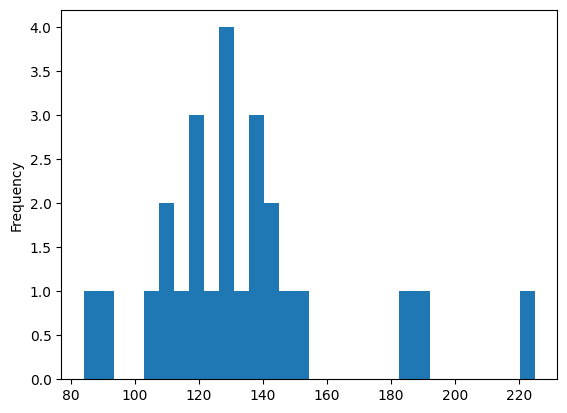

In [55]:
histogram['runtime'].plot(kind='hist',bins=30)